In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 108.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
pip install numpy==1.24.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 51.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.3 which is

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [ ]:
# Set a distinct plotting style (using "seaborn-muted" and custom color palette)
plt.style.use("seaborn-v0_8-muted")
sns.set_theme(style="whitegrid", palette="Spectral")
plt.rcParams['figure.figsize'] = (10, 6)


In [ ]:
df = pd.read_csv("/content/UCI_Credit_Card.csv")
print("Dataset shape:", df.shape)
print("\nDataset preview:")
df.head()

Dataset shape: (30000, 25)

Dataset preview:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2          

In [ ]:
print("\nTarget distribution:")
df['default.payment.next.month'].value_counts()


Target distribution:


,count
default.payment.next.month,
0,23364
1,6636


In [ ]:
# 2. Data Preprocessing
# Identify categorical features (assuming 'SEX', 'EDUCATION', 'MARRIAGE', and past payment statuses are categorical)
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']  # You may add more columns if needed
df[categorical_features] = df[categorical_features].astype('category')

In [ ]:
# For simplicity, fill missing values if any exist (here we fill numeric with median)
for col in df.select_dtypes(include=['int64','float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-10-4c1dec638e6c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
print("\nColumns after encoding:")
df_encoded.columns


Columns after encoding:


Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [ ]:
# Separate features and target
X = df_encoded.drop(columns=['default.payment.next.month'])
y = df_encoded['default.payment.next.month']

In [ ]:

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42, stratify=y
)
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (24000, 31)
Test set shape: (6000, 31)


In [ ]:
# 4. Model Building using CatBoostClassifier
# CatBoost handles categorical features natively, but here we already encoded them.
cat_model = CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.1,
    loss_function='Logloss',
    random_seed=42,
    verbose=0  # We suppress intermediate logging
)

In [ ]:
# Optionally, use GridSearchCV for hyperparameter tuning (here a small grid is used for demo)
param_grid = {
    'iterations': [150, 200],
    'depth': [6, 8],
    'learning_rate': [0.05, 0.1]
}
grid = GridSearchCV(estimator=cat_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ec12290a5d0>,
             n_jobs=-1,
             param_grid={'depth': [6, 8], 'iterations': [150, 200],
                         'learning_rate': [0.05, 0.1]},
             scoring='accuracy')

In [ ]:
print("\nBest Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

best_model = grid.best_estimator_
best_model.fit(X_train, y_train)



Best Parameters: {'depth': 6, 'iterations': 150, 'learning_rate': 0.05}
Best CV Accuracy: 0.82125


In [ ]:
# 5. Model Evaluation
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4422  251]
 [ 844  483]]


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC Score: {roc_auc:.3f}")

ROC AUC Score: 0.780


In [ ]:
# 6. Visualizations

# 6.1 Interactive Plotly ROC Curve
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines+markers',
                         line=dict(color='darkblue', dash='dash'),
                         name=f'ROC Curve (AUC = {roc_auc:.3f})'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines',
                         line=dict(color='gray', dash='dot'),
                         name='Baseline'))
fig.update_layout(
    title="Interactive ROC Curve",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
    hovermode="closest"
)
fig.show()

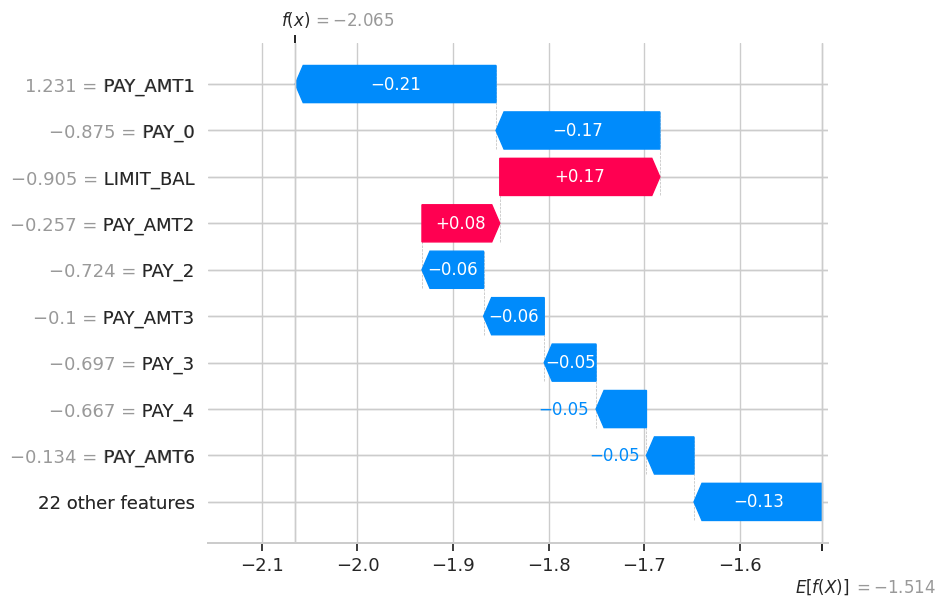

<ipython-input-26-0e46dc2bc8c5>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




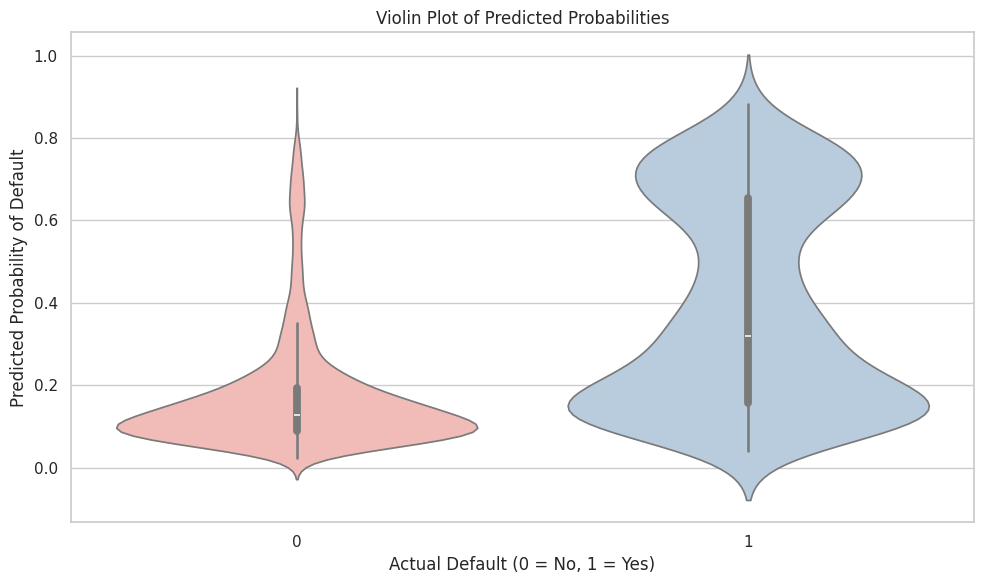

In [ ]:
# 6.2 Waterfall Chart for Feature Importance using SHAP values (if SHAP is installed)
# If SHAP is not installed, please install via: pip install shap
import shap
# Initialize the SHAP explainer for the model
explainer = shap.TreeExplainer(best_model)
shap_values = explainer(X_test)

# Create a waterfall plot for the first test sample
shap.initjs()

# Directly use the shap_values object:
shap.waterfall_plot(shap_values[0])

# 6.3 Violin Plot of Predicted Probabilities
df_prob = pd.DataFrame({'Actual': y_test, 'Predicted_Prob': y_pred_prob})
plt.figure(figsize=(10,6))
sns.violinplot(x='Actual', y='Predicted_Prob', data=df_prob, palette="Pastel1")
plt.title("Violin Plot of Predicted Probabilities")
plt.xlabel("Actual Default (0 = No, 1 = Yes)")
plt.ylabel("Predicted Probability of Default")
plt.tight_layout()
plt.show()

In [ ]:
# 6.4 3D Scatter Plot: Actual vs Predicted vs Residuals using Plotly
residuals = y_test - y_pred_prob
df_3d = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_prob,
    "Residual": residuals
})
fig3d = px.scatter_3d(df_3d, x="Actual", y="Predicted", z="Residual",
                      color="Residual", color_continuous_scale="Plasma",
                      title="3D Scatter Plot: Actual, Predicted, and Residuals")
fig3d.update_layout(scene=dict(
    xaxis_title="Actual Default",
    yaxis_title="Predicted Probability",
    zaxis_title="Residual"
))
fig3d.show()

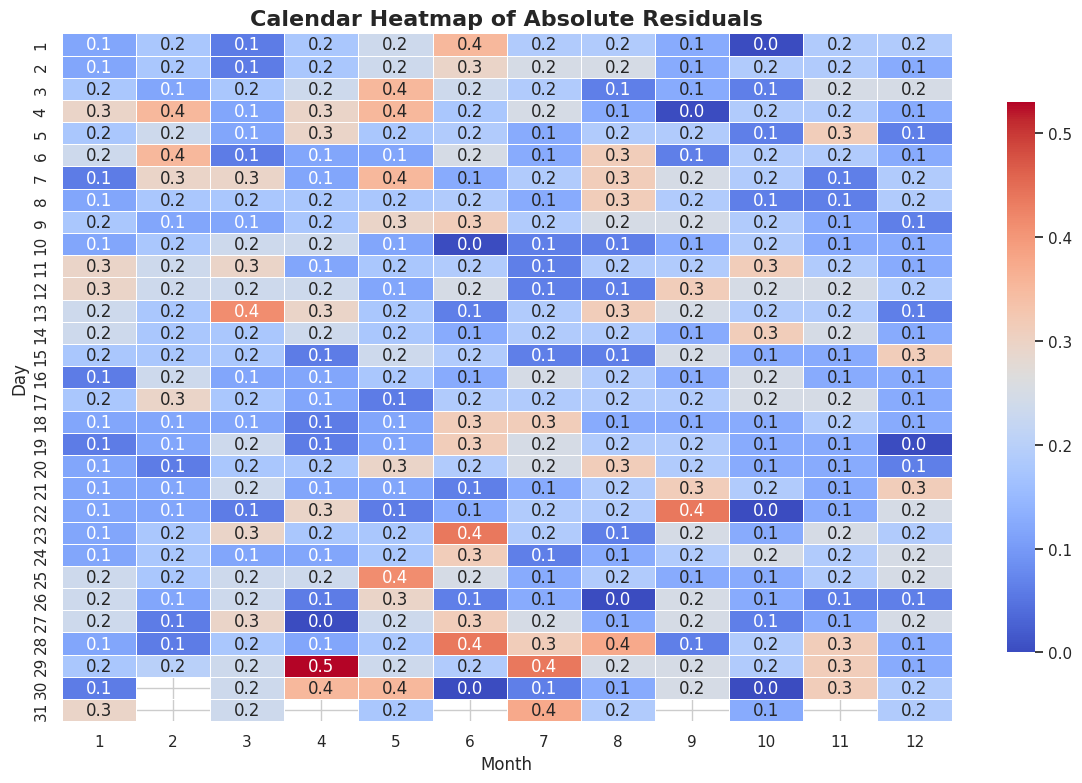

In [ ]:
# 6.5 Calendar Heatmap of Residuals (Alternative Visual)
# For demonstration, we assume the test set corresponds to sequential days starting from a fixed date.
dates = pd.date_range(start="2020-01-01", periods=len(y_test), freq="D")

# Create DataFrame with dates and residuals
df_calendar = pd.DataFrame({
    "Date": dates,
    "Residual": np.abs(y_test - y_pred) # Calculate residuals correctly
})

# Extract month and day from dates
df_calendar["Month"] = df_calendar["Date"].dt.month
df_calendar["Day"] = df_calendar["Date"].dt.day

# Handle duplicates by grouping and averaging residuals
calendar_data = df_calendar.groupby(["Day", "Month"]).mean().reset_index()
calendar_data = calendar_data.pivot(index="Day", columns="Month", values="Residual")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(calendar_data, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".1f", cbar_kws={'shrink': 0.8})
plt.title("Calendar Heatmap of Absolute Residuals", fontsize=16, weight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Day", fontsize=12)
plt.tight_layout()
plt.show()